In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../outputs/farm_300_run_sci_mode.json', 'r') as file:
    data = json.load(file)

In [3]:
data.keys()

dict_keys(['Input Parameters', 'Crop Nitrogen Residue', 'Emission Factors', 'Total Direct Nitrogen Emission'])

In [4]:
results = data['Total Direct Nitrogen Emission']
results.keys()

dict_keys(['P', 'PE', 'FR_Topo', 'soil_texture', 'RF_AM', 'RF_CS', 'RF_NS', 'RF_Till', 'carbon_concentration', 'S_s', 'S_r', 'S_p', 'moisture', 'R_p', 'R_s', 'R_r', 'R_e', 'N_p', 'N_s', 'N_r', 'N_e'])

In [5]:
type(results['P']['co2_crop_direct'])

list

In [16]:
num_samples = [50, 80, 90, 100, 120, 140, 160, 180, 200, 300]

In [17]:
sampling_var = {}
for key, value in results.items():
    # print(type(results[key]))
    sampling_var[key] = [np.nanstd(random.sample(results[key]['co2_crop_direct'], num), ddof=1) for num in num_samples]

In [18]:
sampling_var

{'P': [296.488628096474,
  283.19311887513146,
  290.49880711565737,
  295.93743112324887,
  292.6757772076852,
  298.3031729851223,
  300.58632800545246,
  292.4739083812813],
 'PE': [24.294399591090112,
  21.46302120922149,
  21.979490756338947,
  21.622188230672958,
  23.145010971919863,
  22.664205337511323,
  21.808029546116007,
  22.846169042663185],
 'FR_Topo': [10.957780755854886,
  10.828965680896347,
  10.857546452257703,
  10.427603493600717,
  9.938221720310638,
  10.275293288667607,
  10.654294719835649,
  10.56375094363501],
 'soil_texture': [272.66520291572925,
  211.65829013176244,
  263.38927466769366,
  274.6110639238603,
  276.839388898857,
  281.639196182749,
  277.1647832932436,
  262.4387377315185],
 'RF_AM': [150.53661246125333,
  136.06630201497708,
  149.24417708808568,
  151.54537631008898,
  153.80331984892786,
  147.319652789644,
  150.66689788187787,
  149.46049164771156],
 'RF_CS': [154.19901049856014,
  154.1737092507694,
  144.3322289274857,
  158.764951

In [19]:
sampling_results = {}

for key, value in results.items():
    # print(type(results[key]))
    sampling_results[key] = [random.sample(results[key]['co2_crop_direct'], num) for num in num_samples]

In [20]:
number_params = len(sampling_results.keys())
number_params
    

21

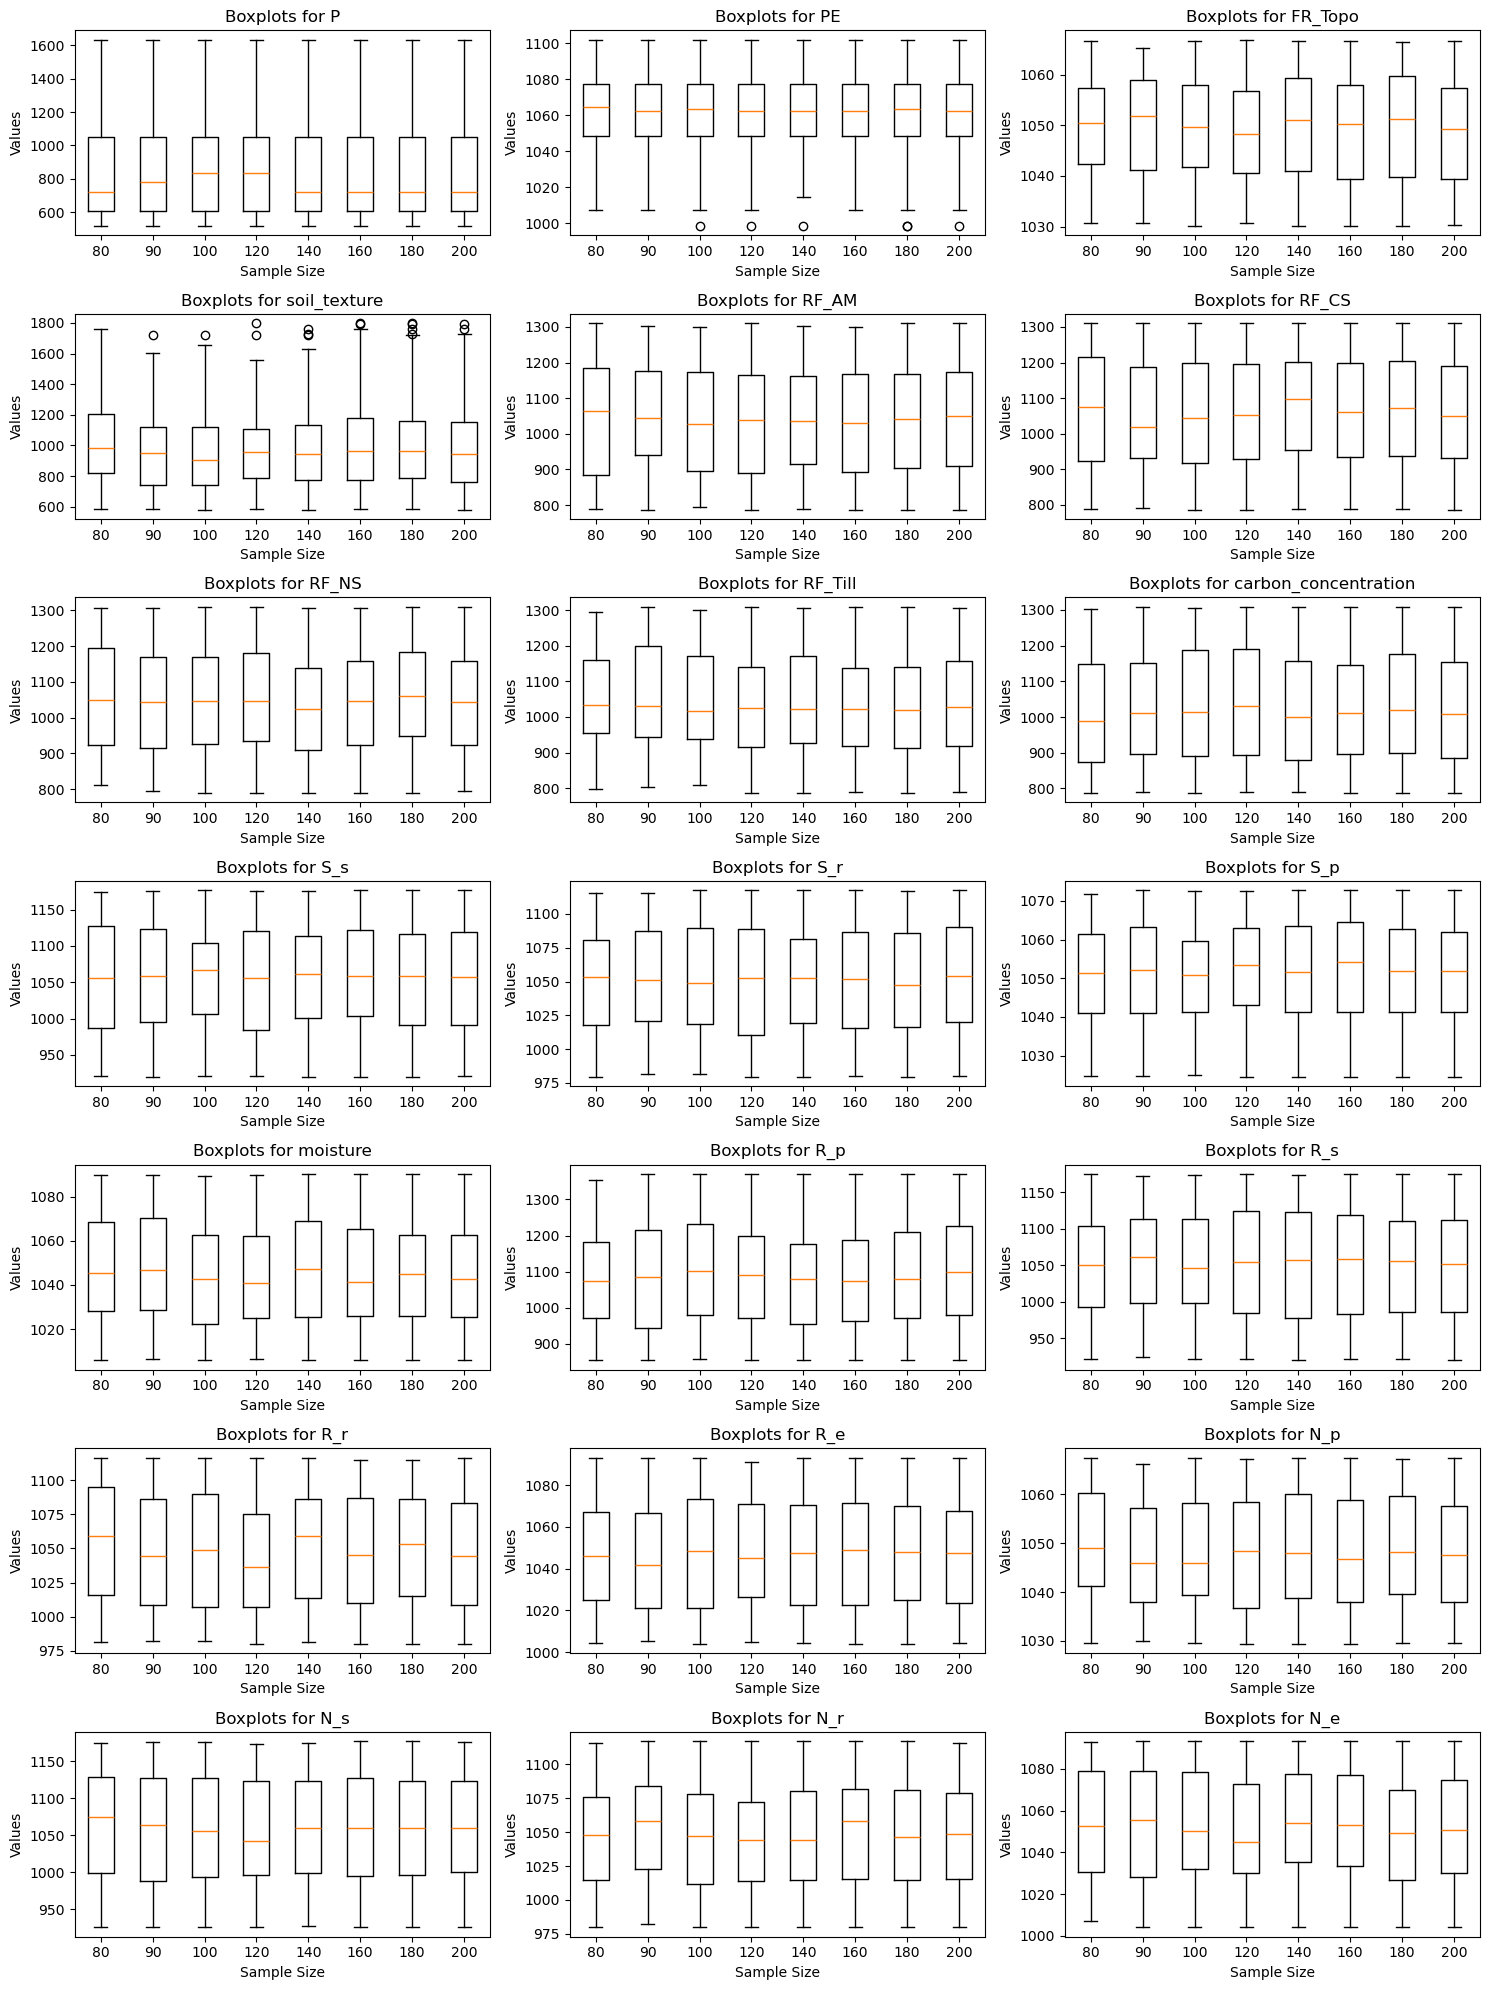

In [21]:
fig, axes = plt.subplots(7, 3, figsize=(15, 20))
axes = axes.flatten()
for ax, (key, samples) in zip(axes, sampling_results.items()):
    cleaned_samples = [list(filter(lambda x: not np.isnan(x), sublist)) for sublist in samples]
    cleaned_samples = [sublist for sublist in cleaned_samples if sublist]

    ax.boxplot(cleaned_samples)
    ax.set_title(f'Boxplots for {key}')
    ax.set_xticks(range(1, len(num_samples) + 1))
    ax.set_xticklabels(num_samples)
    ax.set_xlabel('Sample Size')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()